In [38]:
from IPython.display import display, HTML

display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
  $('div.input').hide();
 } else {
  $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [40]:
df = pd.read_excel("../data/pop_landscape_finale.xlsx")

# Correct gender categories
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].replace({'female': 'Female', 'male': 'Male'})

In [41]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   nom_prenom_match          498 non-null    object        
 1   natt                      498 non-null    int64         
 2   NEFG                      498 non-null    int64         
 3   NEFG2                     498 non-null    object        
 4   birth_date                498 non-null    datetime64[ns]
 5   LT_age                    498 non-null    float64       
 6   LT_date                   498 non-null    datetime64[ns]
 7   center                    498 non-null    object        
 8   aetiology                 498 non-null    int64         
 9   gender                    498 non-null    object        
 10  taille                    498 non-null    float64       
 11  bmi                       498 non-null    float64       
 12  donneur_age           

In [42]:
df.describe()

,natt,NEFG,birth_date,LT_age,LT_date,aetiology,taille,bmi,donneur_age,donneur_PF,...,CLAD_ddn,CLAD_delay,LT_age_2,patient_survival_delay_2,graft_survival_delay_2,CLAD_delay_2,donneur_tabac_2,aetiology_2,aetiology_3,aetiology_3_and_1
count,498.000000,498.000000,498,498.000000,498,498.000000,498.000000,498.000000,498.000000,498.000000,...,420,416.000000,498.000000,498.000000,498.000000,420.000000,498.000000,498.000000,498.000000,498.000000
mean,219698.889558,286018.596386,1975-06-07 17:00:43.373493984,40.040271,2015-06-15 11:57:06.506024192,2.755020,1.655602,20.444730,47.522088,372.233373,...,2018-10-11 00:51:25.714285568,1376.915865,40.021365,1632.670683,1596.759036,1379.788095,0.393574,0.116466,0.538153,0.751004
min,177376.000000,14316.000000,1944-12-28 00:00:00,15.000000,2010-02-16 00:00:00,1.000000,1.420000,13.266879,9.000000,78.000000,...,2011-03-16 00:00:00,39.000000,15.060000,14.000000,14.000000,39.000000,0.000000,0.000000,0.000000,0.000000
25%,201719.250000,229739.500000,1962-02-04 00:00:00,27.365068,2013-03-23 18:00:00,2.000000,1.592500,17.559127,38.000000,309.812500,...,2018-03-16 00:00:00,657.500000,27.322500,786.250000,743.750000,657.500000,0.000000,0.000000,0.000000,1.000000
50%,219193.500000,277111.500000,1976-08-11 12:00:00,38.000000,2015-07-02 12:00:00,3.000000,1.650000,19.414601,49.500000,365.000000,...,2019-10-17 00:00:00,1221.000000,38.115000,1525.500000,1488.000000,1221.000000,0.000000,0.000000,1.000000,1.000000
75%,238589.750000,362554.000000,1987-06-24 18:00:00,54.000000,2017-10-14 18:00:00,3.000000,1.717500,22.390287,61.000000,436.000000,...,2019-12-27 00:00:00,2010.250000,53.542500,2440.500000,2394.500000,2011.000000,1.000000,0.000000,1.000000,1.000000
max,257010.000000,395886.000000,2003-11-12 00:00:00,74.704110,2019-11-01 00:00:00,6.000000,1.920000,36.628512,77.000000,606.000000,...,2020-12-09 00:00:00,3598.000000,74.650000,3775.000000,3775.000000,3598.000000,1.000000,1.000000,1.000000,1.000000
std,21296.068283,69602.208389,NaN,14.114639,NaN,1.265637,0.090612,4.139468,15.610079,88.070191,...,NaN,853.959047,14.112500,978.220999,974.441475,862.404072,0.489034,0.321105,0.499044,0.432866


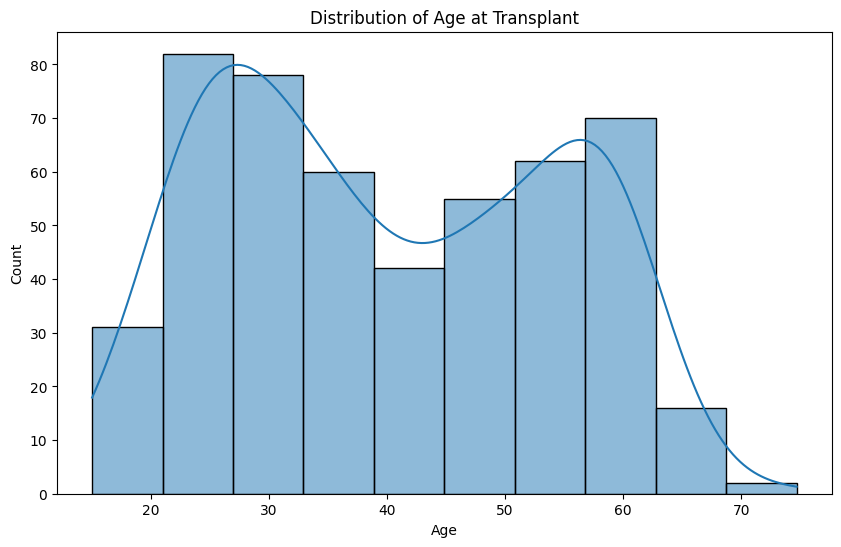

In [43]:
# Distribution of age at transplant
plt.figure(figsize=(10, 6))
sns.histplot(df['LT_age'], kde=True)
plt.title('Distribution of Age at Transplant')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [44]:
df['gender'].value_counts()

gender
Female    258
Male      240
Name: count, dtype: int64

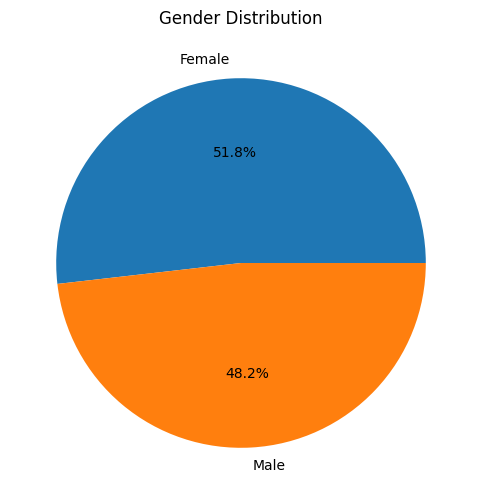

In [45]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


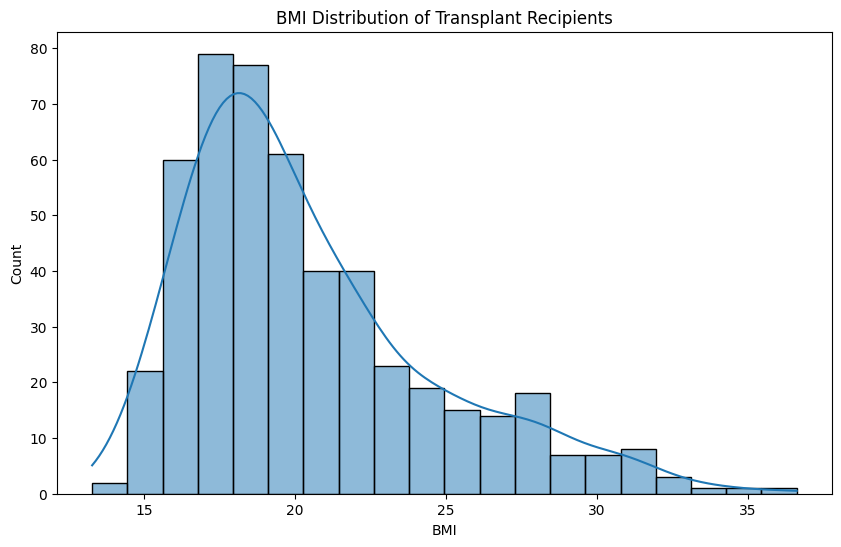

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution of Transplant Recipients')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


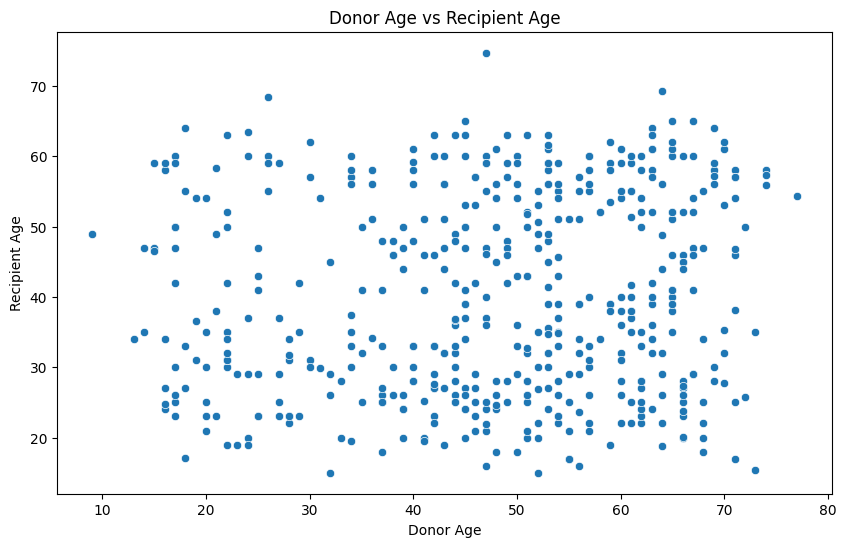

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='donneur_age', y='LT_age', data=df)
plt.title('Donor Age vs Recipient Age')
plt.xlabel('Donor Age')
plt.ylabel('Recipient Age')
plt.show()

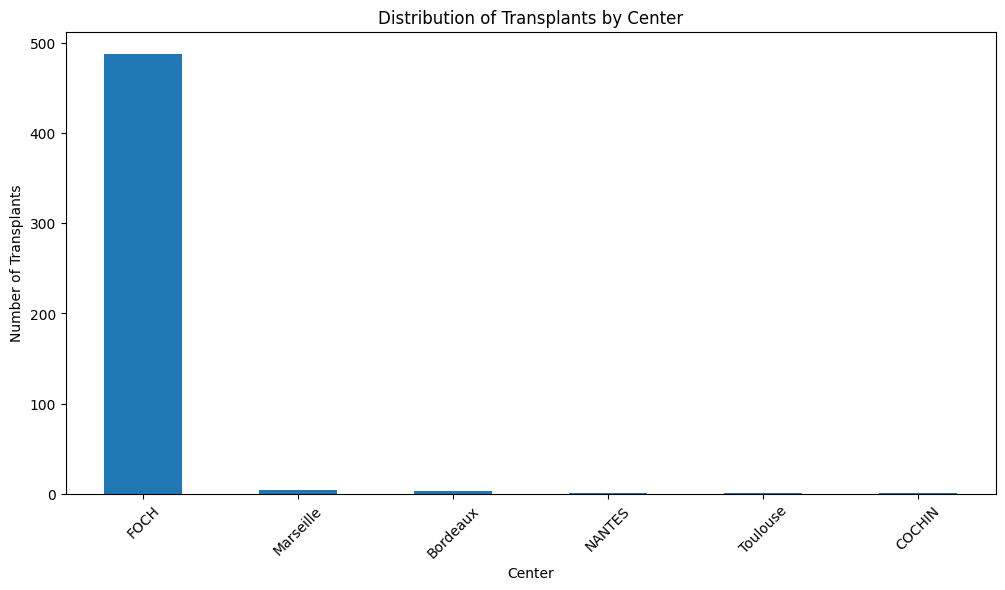

In [48]:
plt.figure(figsize=(12, 6))
df['center'].value_counts().plot(kind='bar')
plt.title('Distribution of Transplants by Center')
plt.xlabel('Center')
plt.ylabel('Number of Transplants')
plt.xticks(rotation=45)
plt.show()

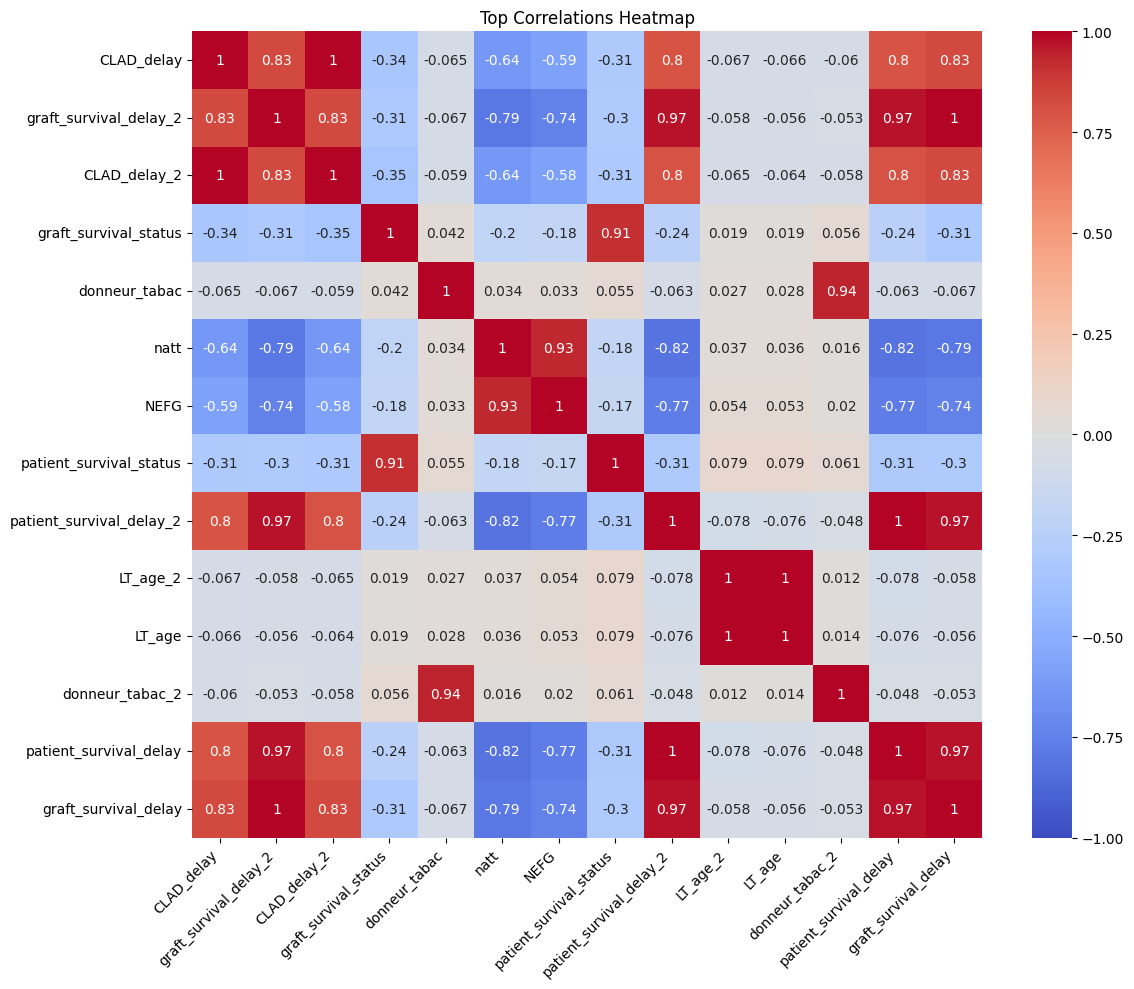

Top 15 Correlations:
graft_survival_delay      graft_survival_delay_2      1.000000
patient_survival_delay    patient_survival_delay_2    1.000000
LT_age                    LT_age_2                    0.999726
CLAD_delay                CLAD_delay_2                0.998780
patient_survival_delay    graft_survival_delay        0.969481
patient_survival_delay_2  graft_survival_delay_2      0.969481
patient_survival_delay    graft_survival_delay_2      0.969481
graft_survival_delay      patient_survival_delay_2    0.969481
donneur_tabac             donneur_tabac_2             0.943251
natt                      NEFG                        0.934091
patient_survival_status   graft_survival_status       0.907123
graft_survival_delay      CLAD_delay_2                0.831462
graft_survival_delay_2    CLAD_delay_2                0.831462
graft_survival_delay      CLAD_delay                  0.828535
CLAD_delay                graft_survival_delay_2      0.828535
dtype: float64


In [49]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Select top correlated features
def get_top_abs_correlations(correlation_matrix, n=10):
    au_corr = correlation_matrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(correlation_matrix)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_redundant_pairs(correlation_matrix):
    pairs_to_drop = set()
    cols = correlation_matrix.columns
    for i in range(0, correlation_matrix.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top 15 correlations
top_correlations = get_top_abs_correlations(correlation_matrix, 15)

# Create a new correlation matrix with only the top correlated features
top_features = list(set([i[0] for i in top_correlations.index] + [i[1] for i in top_correlations.index]))
top_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Top Correlations Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Print the top correlations
print("Top 15 Correlations:")
print(top_correlations)

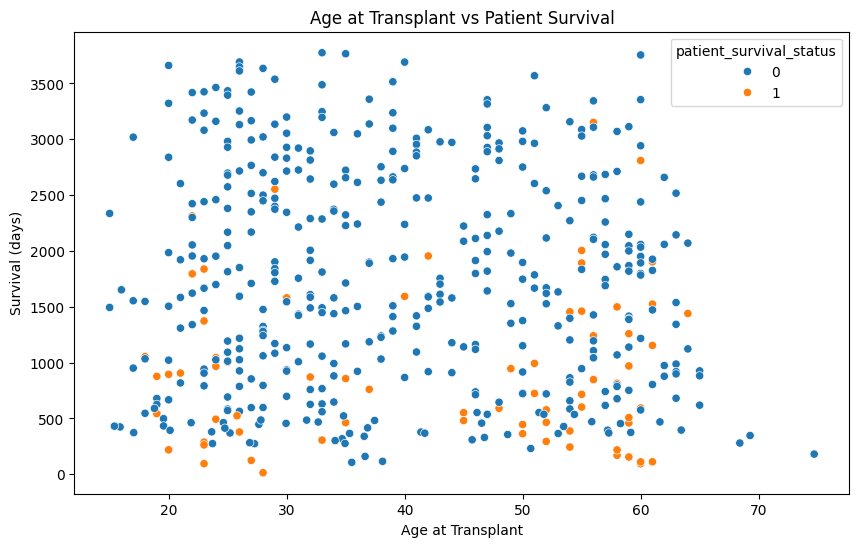

In [50]:
# 2. Age at Transplant vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LT_age', y='patient_survival_delay', hue='patient_survival_status', data=df)
plt.title('Age at Transplant vs Patient Survival')
plt.xlabel('Age at Transplant')
plt.ylabel('Survival (days)')
plt.show()


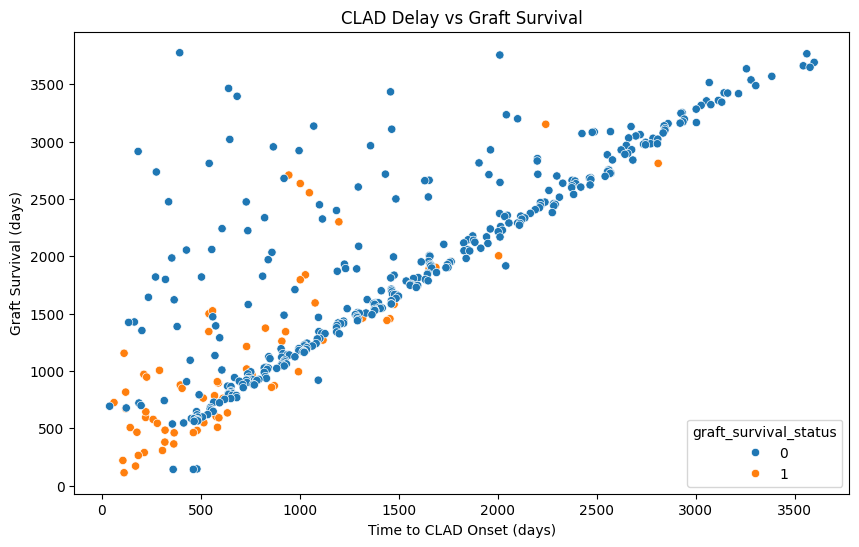

In [51]:
# 3. CLAD Delay vs Graft Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLAD_delay', y='graft_survival_delay', hue='graft_survival_status', data=df)
plt.title('CLAD Delay vs Graft Survival')
plt.xlabel('Time to CLAD Onset (days)')
plt.ylabel('Graft Survival (days)')
plt.show()

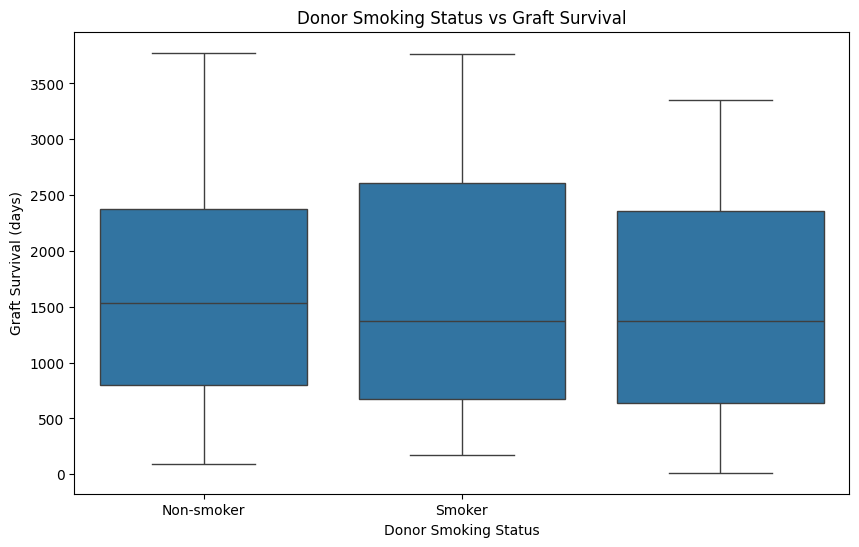

In [52]:
# 4. Donor Smoking Status vs Graft Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='donneur_tabac', y='graft_survival_delay', data=df)
plt.title('Donor Smoking Status vs Graft Survival')
plt.xlabel('Donor Smoking Status')
plt.ylabel('Graft Survival (days)')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])
plt.show()

In [53]:
# 7. CLAD Impact on Survival
clad_impact = df.groupby('CLAD_status')['patient_survival_delay'].mean()
print("\nAverage survival time based on CLAD status:")
print(clad_impact)


Average survival time based on CLAD status:
CLAD_status
0.0    1804.042857
1.0    1876.446809
Name: patient_survival_delay, dtype: float64


In [54]:
# 8. Donor Smoking Impact
smoker_impact = df.groupby('donneur_tabac')['graft_survival_delay'].agg(['mean', 'median', 'std'])
print("\nGraft survival statistics based on donor smoking status:")
print(smoker_impact)


Graft survival statistics based on donor smoking status:
                      mean  median          std
donneur_tabac                                  
0              1638.314570  1535.0   959.302811
1              1648.688525  1376.0  1076.432310
2              1480.333333  1373.0   957.618080


In [55]:
# 10. Survival Rate by Age Group
df['age_group'] = pd.cut(df['LT_age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
survival_rate = df.groupby('age_group',observed=False)['patient_survival_status'].apply(lambda x: (x == 0).mean(), )
print("\nSurvival rate by age group:")
print(survival_rate)



Survival rate by age group:
age_group
0-20     0.800000
21-40    0.894515
41-60    0.815000
61-80    0.838710
81+           NaN
Name: patient_survival_status, dtype: float64


In [56]:
# 11. Statistical Test: Donor Smoking Impact on Graft Survival
smoker_survival = df[df['donneur_tabac'] == 1]['graft_survival_delay']
non_smoker_survival = df[df['donneur_tabac'] == 0]['graft_survival_delay']
t_stat, p_value = stats.ttest_ind(smoker_survival, non_smoker_survival)
print(f"\nt-test for graft survival difference based on donor smoking status:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


t-test for graft survival difference based on donor smoking status:
t-statistic: 0.0754
p-value: 0.9399


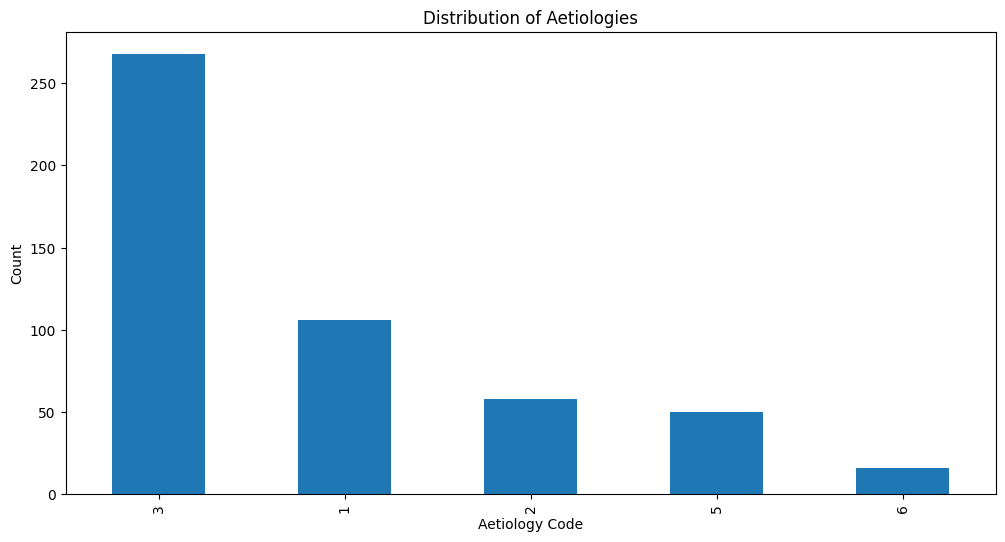

In [57]:
aetiology_counts = df['aetiology'].value_counts()
plt.figure(figsize=(12, 6))
aetiology_counts.plot(kind='bar')
plt.title('Distribution of Aetiologies')
plt.xlabel('Aetiology Code')
plt.ylabel('Count')
plt.show()

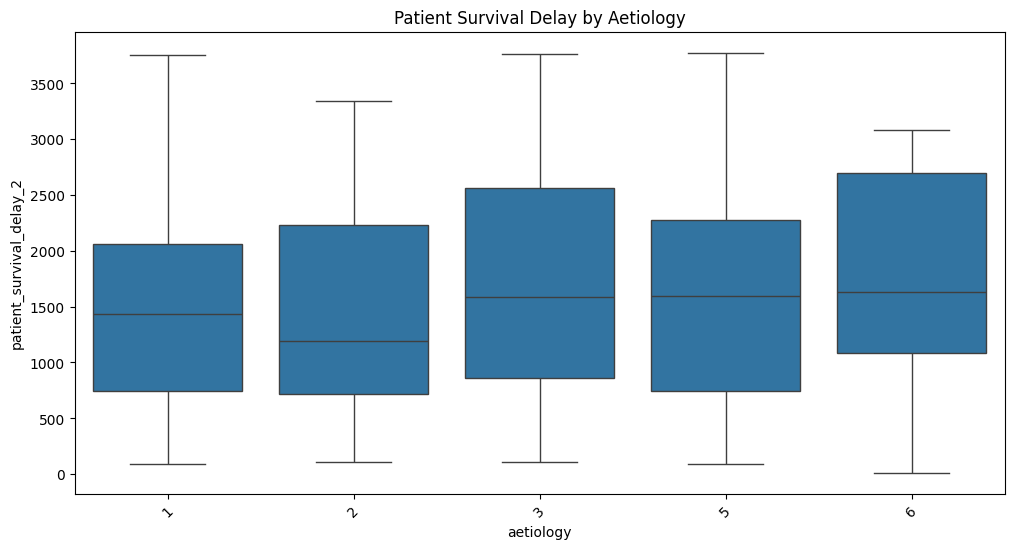

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='aetiology', y='patient_survival_delay_2', data=df)
plt.title('Patient Survival Delay by Aetiology')
plt.xticks(rotation=45)
plt.show()

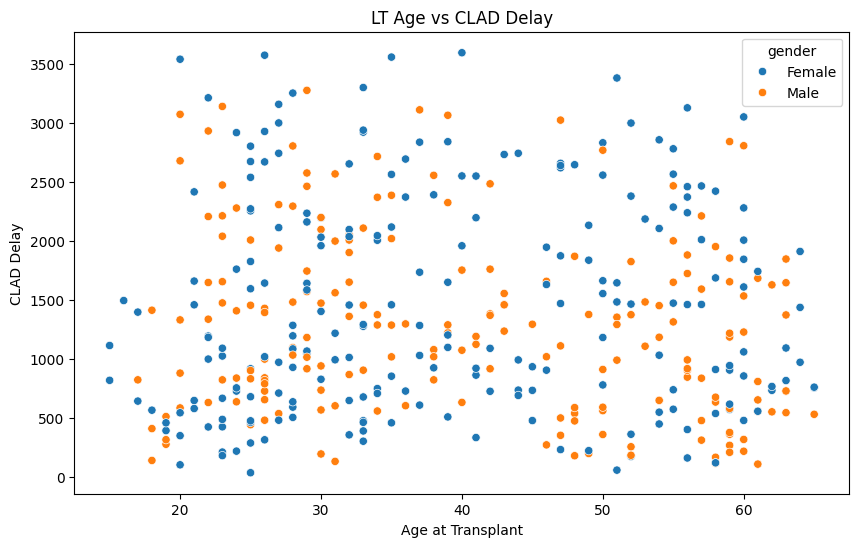

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LT_age', y='CLAD_delay', hue='gender', data=df)
plt.title('LT Age vs CLAD Delay')
plt.xlabel('Age at Transplant')
plt.ylabel('CLAD Delay')
plt.show()

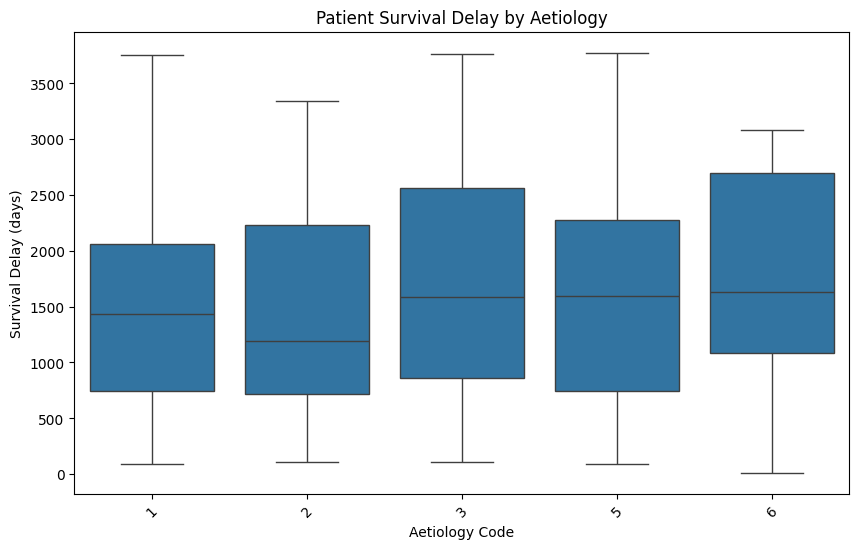

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='aetiology', y='patient_survival_delay', data=df)
plt.title('Patient Survival Delay by Aetiology')
plt.xlabel('Aetiology Code')
plt.ylabel('Survival Delay (days)')
plt.xticks(rotation=45)
plt.show()

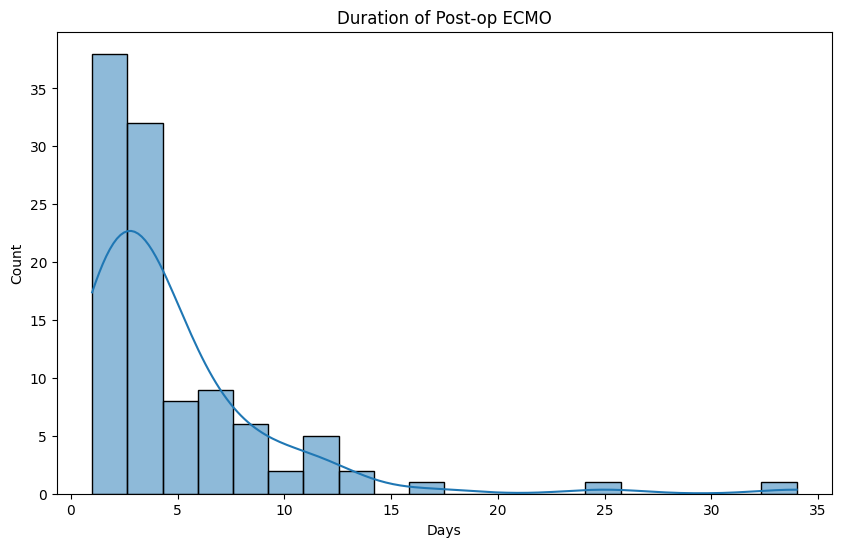

In [61]:
ecmo_data = df[df['ECMO_postop'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(ecmo_data['ECMO_postop_duree_jours'], kde=True)
plt.title('Duration of Post-op ECMO')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

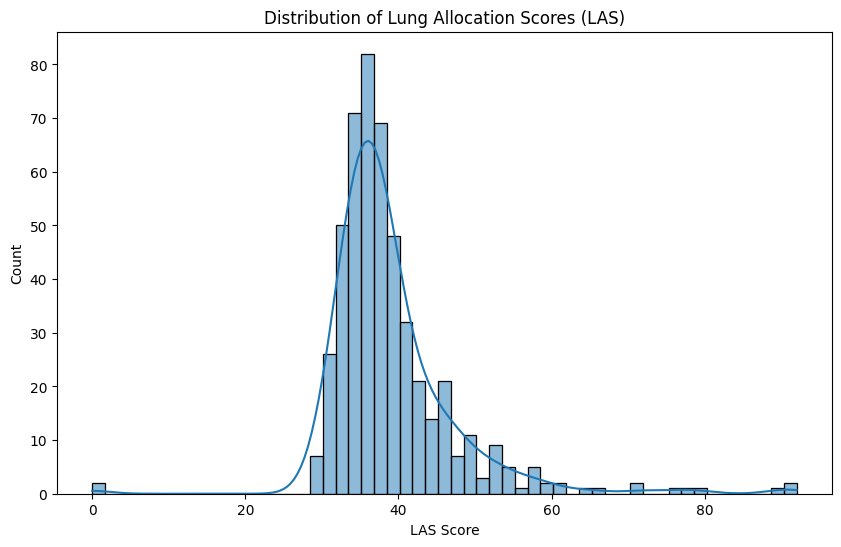

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LAS'], kde=True)
plt.title('Distribution of Lung Allocation Scores (LAS)')
plt.xlabel('LAS Score')
plt.ylabel('Count')
plt.show()

In [63]:

# Print some summary statistics
print("Summary Statistics:")
print(df[['LT_age', 'bmi', 'donneur_age', 'LAS', 'patient_survival_delay']].describe())

# Print the most common aetiologies
print("\nTop 5 most common aetiologies:")
print(aetiology_counts.head())

# Print ECMO usage statistics
print(f"\nPercentage of patients requiring post-op ECMO: {(df['ECMO_postop'] == 1).mean()*100:.2f}%")

# Print survival statistics
print(f"\nOverall survival rate: {(df['patient_survival_status'] == 0).mean()*100:.2f}%")

Summary Statistics:
           LT_age         bmi  donneur_age         LAS  patient_survival_delay
count  498.000000  498.000000   498.000000  498.000000              498.000000
mean    40.040271   20.444730    47.522088   39.054317             1632.670683
std     14.114639    4.139468    15.610079    8.543226              978.220999
min     15.000000   13.266879     9.000000    0.000000               14.000000
25%     27.365068   17.559127    38.000000   34.414000              786.250000
50%     38.000000   19.414601    49.500000   37.100000             1525.500000
75%     54.000000   22.390287    61.000000   41.075000             2440.500000
max     74.704110   36.628512    77.000000   92.000000             3775.000000

Top 5 most common aetiologies:
aetiology
3    268
1    106
2     58
5     50
6     16
Name: count, dtype: int64

Percentage of patients requiring post-op ECMO: 21.08%

Overall survival rate: 85.34%


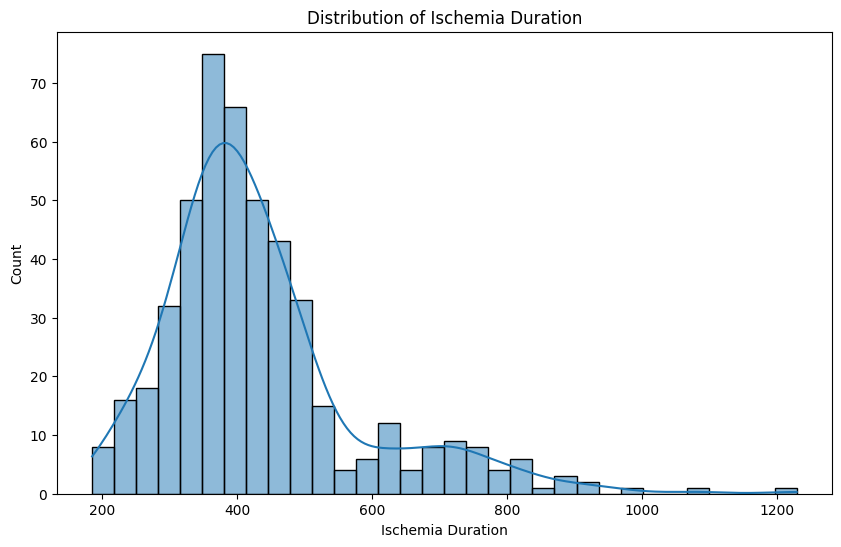

In [64]:

# 1. Ischemia Duration Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['ischemie_duree'].dropna(), kde=True)
plt.title('Distribution of Ischemia Duration')
plt.xlabel('Ischemia Duration')
plt.ylabel('Count')
plt.show()


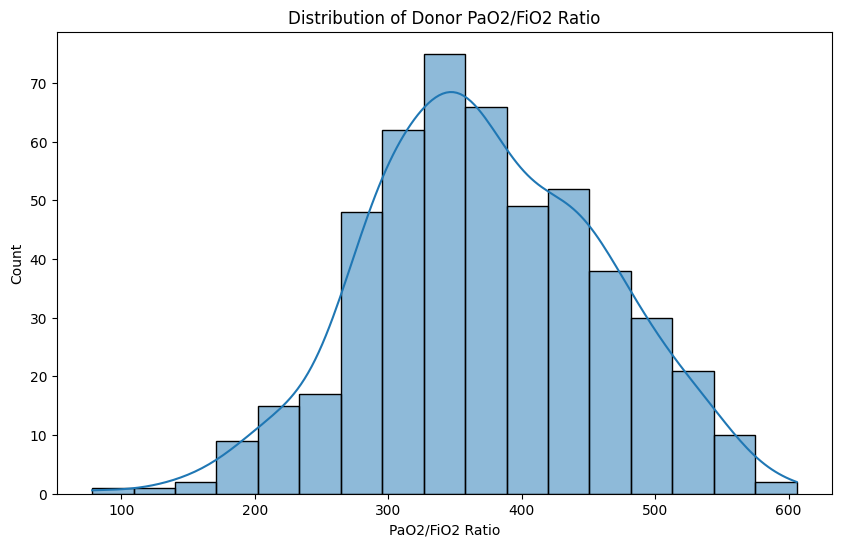

In [65]:
# 2. Donor PaO2/FiO2 Ratio Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['donneur_PF'], kde=True)
plt.title('Distribution of Donor PaO2/FiO2 Ratio')
plt.xlabel('PaO2/FiO2 Ratio')
plt.ylabel('Count')
plt.show()


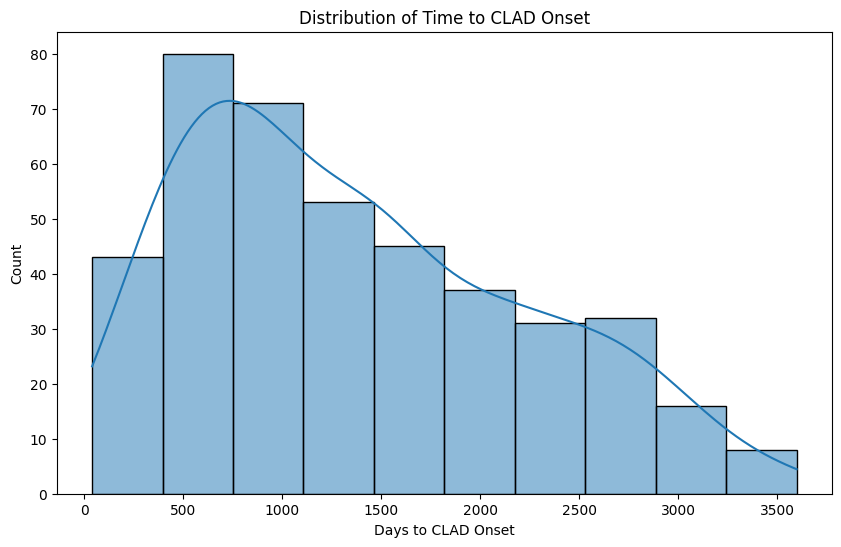

In [66]:
# 3. CLAD (Chronic Lung Allograft Dysfunction) Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['CLAD_delay'].dropna(), kde=True)
plt.title('Distribution of Time to CLAD Onset')
plt.xlabel('Days to CLAD Onset')
plt.ylabel('Count')
plt.show()

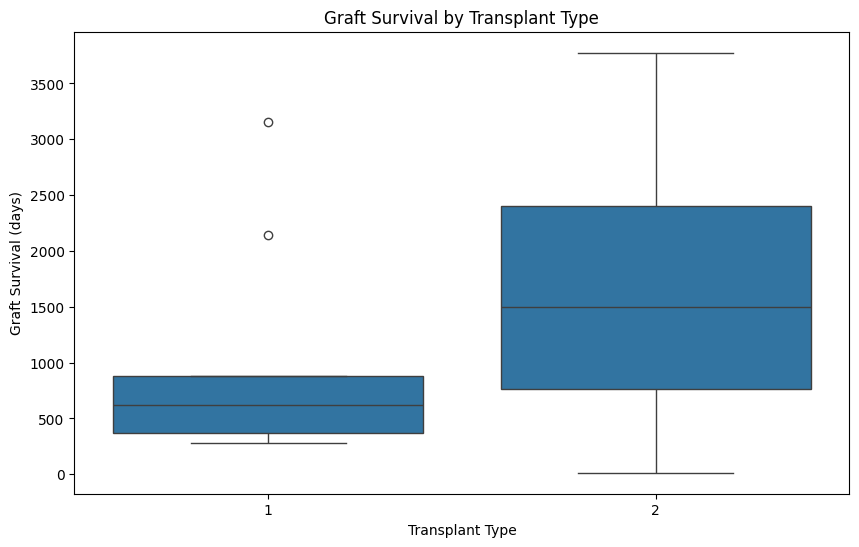

In [67]:
# 4. Graft Survival Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_tp', y='graft_survival_delay', data=df)
plt.title('Graft Survival by Transplant Type')
plt.xlabel('Transplant Type')
plt.ylabel('Graft Survival (days)')
plt.show()


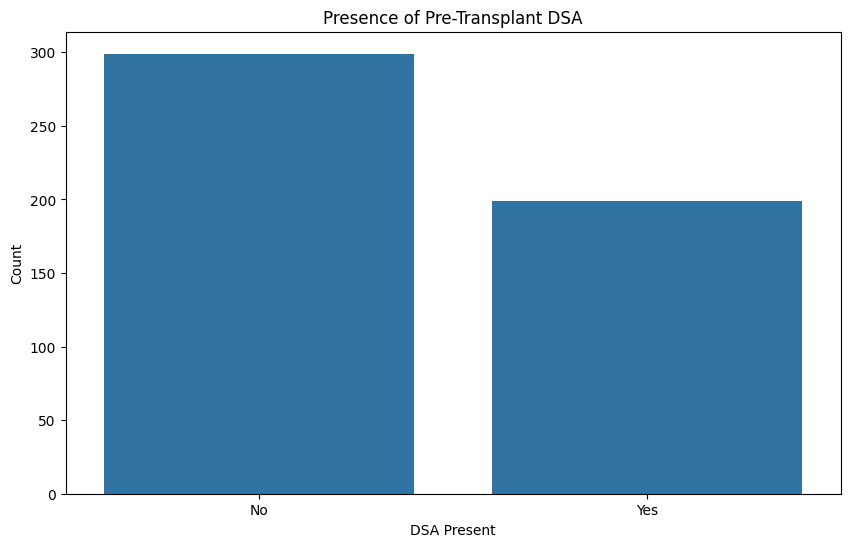

In [68]:
# 5. DSA (Donor-Specific Antibodies) Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='DSA_pre', data=df)
plt.title('Presence of Pre-Transplant DSA')
plt.xlabel('DSA Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

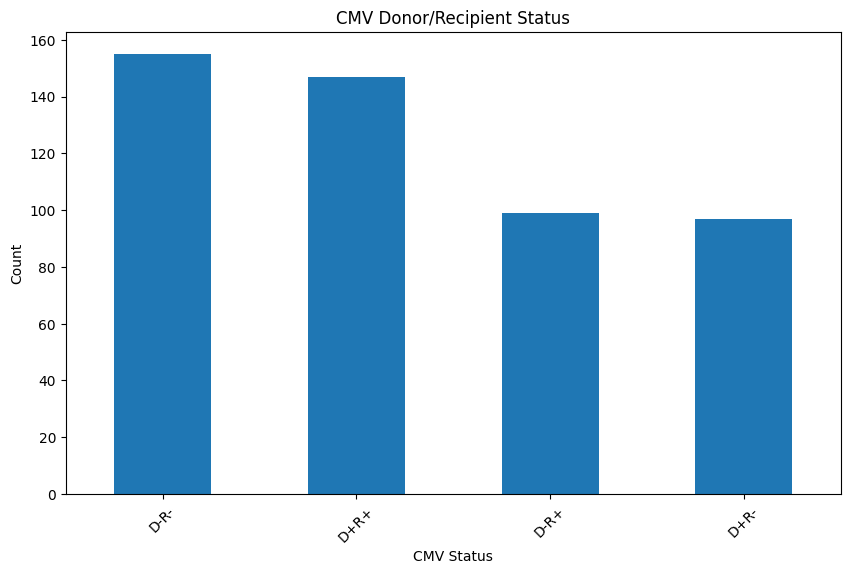

In [69]:
# 6. CMV Donor/Recipient Status
plt.figure(figsize=(10, 6))
df['CMV_DR'].value_counts().plot(kind='bar')
plt.title('CMV Donor/Recipient Status')
plt.xlabel('CMV Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

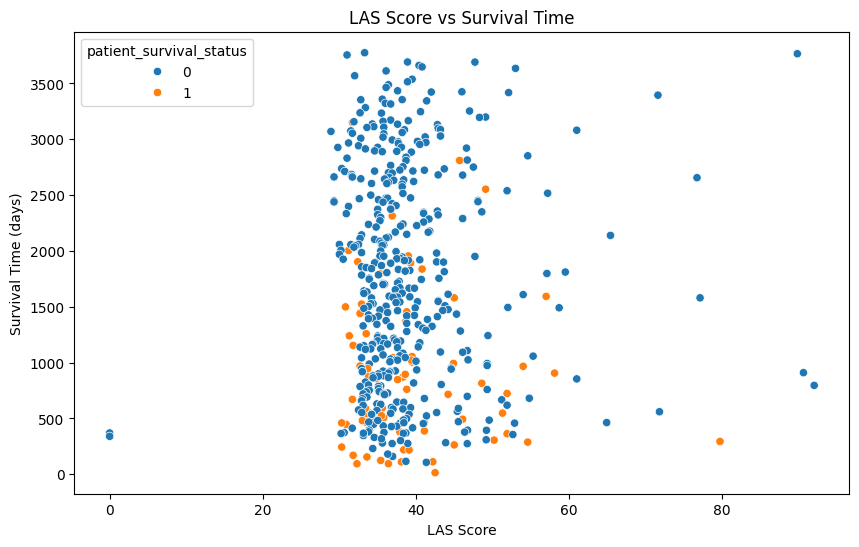

In [70]:
# 7. LAS Score vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LAS', y='patient_survival_delay', hue='patient_survival_status', data=df)
plt.title('LAS Score vs Survival Time')
plt.xlabel('LAS Score')
plt.ylabel('Survival Time (days)')
plt.show()


In [71]:

# 8. Re-transplantation Rate
retx_rate = df['re_tx'].mean() * 100
print(f"Re-transplantation rate: {retx_rate:.2f}%")

# 9. CLAD Status
clad_rate = df['CLAD_status'].mean() * 100
print(f"CLAD rate: {clad_rate:.2f}%")

# 10. Donor Smoking Status
donor_smoking_rate = df['donneur_tabac'].mean() * 100
print(f"Donor smoking rate: {donor_smoking_rate:.2f}%")

# 11. Induction Therapy
induction_rate = df['induction'].mean() * 100
print(f"Induction therapy rate: {induction_rate:.2f}%")

# 12. Super-Urgent Status
su_rate = df['SU'].mean() * 100
print(f"Super-urgent status rate: {su_rate:.2f}%")

# 13. Primary Graft Dysfunction
dpg3_rate = df['DPG3_72h'].mean() * 100
print(f"Primary graft dysfunction (Grade 3 at 72h) rate: {dpg3_rate:.2f}%")

Re-transplantation rate: 3.21%
CLAD rate: 33.49%
Donor smoking rate: 66.47%
Induction therapy rate: 120.28%
Super-urgent status rate: 9.64%
Primary graft dysfunction (Grade 3 at 72h) rate: 20.72%
